In [11]:
import matplotlib
import pandas as pd
import numpy as np
import csv
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
df = pd.read_csv('data/Dataset_onlyPredict.csv', sep="\t")
df.head()

,Lead Protein ID,Compartment Prediction,Prediction Confidence,Sequence
0,Q9BZC7,Endosome,Very High,MGFLHQLQLLLWKNVTLKRRSPWVLAFEIFIPLVLFFILLGLRQKK...
1,Q6RW13,Endosome,Very High,MELPAVNLKVILLGHWLLTTWGCIVFSGSYAWANFTILALGVWAVA...
2,Q9P2R3,Endosome,Very High,MAEEEVAKLEKHLMLLRQEYVKLQKKLAETEKRCALLAAQANKESS...
3,Q96NW4,Endosome,Very High,MALYDEDLLKNPFYLALQKCRPDLCSKVAQIHGIVLVPCKGSLSSS...
4,O00203,Endosome,Very High,MSSNSFPYNEQSGGGEATELGQEATSTISPSGAFGLFSSDLKKNED...


In [13]:
print(df.columns)

Index(['Lead Protein ID', 'Compartment Prediction', 'Prediction Confidence',
       'Sequence'],
      dtype='object')


In [14]:
lengh_seq = []
for seq in df["Sequence"]:
    lengh_seq.append(len(seq))
lengh_seq = np.asarray(lengh_seq)

In [15]:
df["Sequence Lengh"] = lengh_seq

In [16]:
df.head()

,Lead Protein ID,Compartment Prediction,Prediction Confidence,Sequence,Sequence Lengh
0,Q9BZC7,Endosome,Very High,MGFLHQLQLLLWKNVTLKRRSPWVLAFEIFIPLVLFFILLGLRQKK...,2435
1,Q6RW13,Endosome,Very High,MELPAVNLKVILLGHWLLTTWGCIVFSGSYAWANFTILALGVWAVA...,159
2,Q9P2R3,Endosome,Very High,MAEEEVAKLEKHLMLLRQEYVKLQKKLAETEKRCALLAAQANKESS...,1169
3,Q96NW4,Endosome,Very High,MALYDEDLLKNPFYLALQKCRPDLCSKVAQIHGIVLVPCKGSLSSS...,1050
4,O00203,Endosome,Very High,MSSNSFPYNEQSGGGEATELGQEATSTISPSGAFGLFSSDLKKNED...,1094


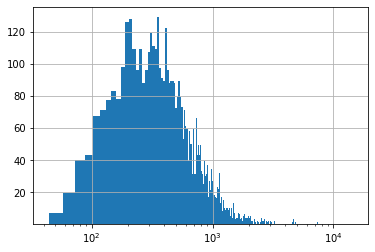

In [17]:
fig, ax = plt.subplots()
df['Sequence Lengh'].hist(ax=ax, bins=1000, bottom=0.1)
ax.set_xscale('log')

In [18]:
indexNames = df[ df['Sequence Lengh'] > 1500 ].index
 
# Delete these row indexes from dataFrame
df_short = df.drop(indexNames , inplace=False).reset_index(drop=True)
df_short.head()

,Lead Protein ID,Compartment Prediction,Prediction Confidence,Sequence,Sequence Lengh
0,Q6RW13,Endosome,Very High,MELPAVNLKVILLGHWLLTTWGCIVFSGSYAWANFTILALGVWAVA...,159
1,Q9P2R3,Endosome,Very High,MAEEEVAKLEKHLMLLRQEYVKLQKKLAETEKRCALLAAQANKESS...,1169
2,Q96NW4,Endosome,Very High,MALYDEDLLKNPFYLALQKCRPDLCSKVAQIHGIVLVPCKGSLSSS...,1050
3,O00203,Endosome,Very High,MSSNSFPYNEQSGGGEATELGQEATSTISPSGAFGLFSSDLKKNED...,1094
4,O14617,Endosome,Very High,MALKMVKGSIDRMFDKNLQDLVRGIRNHKEDEAKYISQCIDEIKQE...,1153


In [9]:
indexNames

Int64Index([   0,   24,   28,   32,   37,  119,  122,  123,  158,  159,
            ...
            5086, 5118, 5122, 5132, 5134, 5135, 5139, 5142, 5152, 5155],
           dtype='int64', length=323)

In [9]:
print(df_short.shape)
print(df.shape)

(4839, 5)
(5162, 5)


In [10]:
df_short.groupby(["Compartment Prediction"]).count()
# I will remove all the No Prediction rows

,Lead Protein ID,Prediction Confidence,Sequence,Sequence Lengh
Compartment Prediction,,,,
Actin binding proteins,81,81,81,81
ER,508,508,508,508
ER_high_curvature,45,45,45,45
Endosome,283,283,283,283
Ergic/cisGolgi,69,69,69,69
Golgi,178,178,178,178
Large Protein Complex,2409,2409,2409,2409
Lysosome,87,87,87,87
Mitochondrion,654,654,654,654


In [11]:
df_short["Compartment Prediction"].value_counts() / len(df_short) *100

Large Protein Complex     49.783013
Mitochondrion             13.515189
ER                        10.498037
Plasma membrane            9.878074
Endosome                   5.848316
Golgi                      3.678446
Lysosome                   1.797892
Actin binding proteins     1.673900
Ergic/cisGolgi             1.425914
ER_high_curvature          0.929944
Peroxisome                 0.516636
Nuclear pore complex       0.454639
Name: Compartment Prediction, dtype: float64

In [12]:
df_short["Compartment Prediction"].value_counts()

Large Protein Complex     2409
Mitochondrion              654
ER                         508
Plasma membrane            478
Endosome                   283
Golgi                      178
Lysosome                    87
Actin binding proteins      81
Ergic/cisGolgi              69
ER_high_curvature           45
Peroxisome                  25
Nuclear pore complex        22
Name: Compartment Prediction, dtype: int64

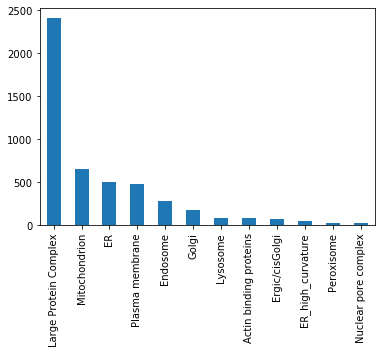

In [13]:
df_short['Compartment Prediction'].value_counts().plot.bar()

In [14]:
df_short.groupby(["Compartment Prediction", "Prediction Confidence"]).count()

Lead Protein ID  Sequence  \
Compartment Prediction Prediction Confidence                              
Actin binding proteins High                                17        17   
                       Low                                 20        20   
                       Medium                              24        24   
                       Very High                            5         5   
                       Very Low                            15        15   
ER                     High                               126       126   
                       Low                                 48        48   
                       Medium                              85        85   
                       Very High                          211       211   
                       Very Low                            38        38   
ER_high_curvature      High                                 7         7   
                       Low                                  9         9   
                       Medium                              14        14   
                       Very High                            8         8   
                       Very Low                             7         7   
Endosome               High                                41        41   
                       Low                                 56        56   
                       Medium                              55        55   
                       Very High                           95        95   
                       Very Low                            36        36   
Ergic/cisGolgi         High                                12        12   
                       Low                                 13        13   
                       Medium                              21        21   
                       Very High                           13        13   
                       Very Low                            10        10   
Golgi                  High                                28        28   
                       Low                                 36        36   
                       Medium                              68        68   
                       Very High                           12        12   
                       Very Low                            34        34   
Large Protein Complex  High                               485       485   
                       Low                                221       221   
                       Medium                             397       397   
                       Very High                         1042      1042   
                       Very Low                           264       264   
Lysosome               High                                20        20   
                       Low                                  8         8   
                       Medium                              16        16   
                       Very High                           41        41   
                       Very Low                             2         2   
Mitochondrion          High                               371       371   
                       Low                                 55        55   
                       Medium                             170       170   
                       Very High                            7         7   
                       Very Low                            51        51   
Nuclear pore complex   High                                10        10   
                       Low                                  4         4   
                       Medium                               2         2   
                       Very High                            3         3   
                       Very Low                             3         3   
Peroxisome             High                                 6         6   
                       Low                                  5         5

## Simplifying the Dataset

### Combining ER and High Curvature ER

In [19]:
df_simple = df_short.replace('ER_high_curvature', 'ER')

In [20]:
df_simple["Compartment Prediction"].value_counts() / len(df_simple) *100

Large Protein Complex     49.783013
Mitochondrion             13.515189
ER                        11.427981
Plasma membrane            9.878074
Endosome                   5.848316
Golgi                      3.678446
Lysosome                   1.797892
Actin binding proteins     1.673900
Ergic/cisGolgi             1.425914
Peroxisome                 0.516636
Nuclear pore complex       0.454639
Name: Compartment Prediction, dtype: float64

### Deleting too small categories 

I will delete NPC and Peroxisome as well as Ergic/cisGolgi because it is probably proteins found in 2 compartment

In [21]:
df_simple = df_simple[df_simple["Compartment Prediction"] != 'Nuclear pore complex'].reset_index(drop=True)
df_simple = df_simple[df_simple["Compartment Prediction"] != 'Peroxisome'].reset_index(drop=True)

In [22]:
df_simple = df_simple[df_simple["Compartment Prediction"] != 'Ergic/cisGolgi'].reset_index(drop=True)

In [23]:
df_simple["Compartment Prediction"].value_counts() / len(df_simple) *100

Large Protein Complex     51.005717
Mitochondrion             13.847131
ER                        11.708660
Plasma membrane           10.120686
Endosome                   5.991954
Golgi                      3.768791
Lysosome                   1.842050
Actin binding proteins     1.715012
Name: Compartment Prediction, dtype: float64

In [24]:
df_simple["Compartment Prediction"].value_counts()

Large Protein Complex     2409
Mitochondrion              654
ER                         553
Plasma membrane            478
Endosome                   283
Golgi                      178
Lysosome                    87
Actin binding proteins      81
Name: Compartment Prediction, dtype: int64

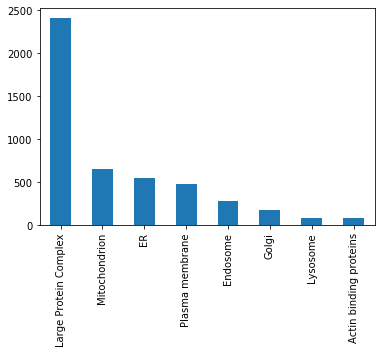

In [25]:
df_simple['Compartment Prediction'].value_counts().plot.bar()

## Split Simpler dataset into 3

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_simple, df_simple["Compartment Prediction"]):
    trainVal_set = df_simple.loc[train_index]
    test_set = df_simple.loc[test_index]

In [23]:
trainVal = trainVal_set.reset_index(drop=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_index, valid_index in split.split(trainVal, trainVal["Compartment Prediction"]):
    train_set = trainVal.loc[train_index]
    valid_set = trainVal.loc[valid_index]

In [24]:
df_simple.groupby(["Compartment Prediction", "Prediction Confidence"]).count()

Lead Protein ID  Sequence  \
Compartment Prediction Prediction Confidence                              
Actin binding proteins High                                17        17   
                       Low                                 20        20   
                       Medium                              24        24   
                       Very High                            5         5   
                       Very Low                            15        15   
ER                     High                               133       133   
                       Low                                 57        57   
                       Medium                              99        99   
                       Very High                          219       219   
                       Very Low                            45        45   
Endosome               High                                41        41   
                       Low                                 56        56   
                       Medium                              55        55   
                       Very High                           95        95   
                       Very Low                            36        36   
Golgi                  High                                28        28   
                       Low                                 36        36   
                       Medium                              68        68   
                       Very High                           12        12   
                       Very Low                            34        34   
Large Protein Complex  High                               485       485   
                       Low                                221       221   
                       Medium                             397       397   
                       Very High                         1042      1042   
                       Very Low                           264       264   
Lysosome               High                                20        20   
                       Low                                  8         8   
                       Medium                              16        16   
                       Very High                           41        41   
                       Very Low                             2         2   
Mitochondrion          High                               371       371   
                       Low                                 55        55   
                       Medium                             170       170   
                       Very High                            7         7   
                       Very Low                            51        51   
Plasma membrane        High                                55        55   
                       Low                                 57        57   
                       Medium                              76        76   
                       Very High                          238       238   
                       Very Low                            52        52   

                                              Sequence Lengh  
Compartment Prediction Prediction Confidence                  
Actin binding proteins High                               17  
                       Low                                20  
                       Medium                             24  
                       Very High                           5  
                       Very Low                           15  
ER                     High                              133  
                       Low                                57  
                       Medium                             99  
                       Very High                         219  
                       Very Low                           45  
Endosome               High                               41  
                       Low                                56  
             

NB: should I kick out very low prediction???

In [28]:
train_set.to_csv(path_or_buf= "data/9C_train.csv", sep="\t", index=False)
valid_set.to_csv(path_or_buf= "data/9C_valid.csv", sep="\t", index=False)
test_set.to_csv(path_or_buf="data/9C_test.csv", sep="\t", index=False)